# Homework 1

In [873]:
import pandas as pd 
import requests
import seaborn as sns
import json
import sqlite3
import datetime

## JSON

I will first read in a JSON Of Nobel prize winners

In [874]:
request_get = requests.get("http://api.nobelprize.org/v1/prize.json")
data_dict = json.loads(request_get.text)

In [875]:
data_dict.keys()

dict_keys(['prizes'])

Since the data has been read in, my next step is to turn the json into a dataset to determine if it was read in correctly and if there are any errors

In [876]:
Nobel = pd.DataFrame(data_dict['prizes'])

In [877]:
Nobel.head()

,category,laureates,overallMotivation,year
0,physics,"[{'id': '960', 'firstname': 'Arthur', 'surname...",“for groundbreaking inventions in the field of...,2018
1,chemistry,"[{'id': '963', 'firstname': 'Frances H.', 'sur...",NaN,2018
2,medicine,"[{'id': '958', 'firstname': 'James P.', 'surna...",NaN,2018
3,peace,"[{'id': '966', 'firstname': 'Denis', 'surname'...",NaN,2018
4,economics,"[{'id': '968', 'firstname': 'William D.', 'sur...",NaN,2018


Another way that I can read I can assess my data is by using .text to get the raw text and analyze it that way

In [878]:
request_get.text

'{"prizes":[{"year":"2018","category":"physics","overallMotivation":"\\u201cfor groundbreaking inventions in the field of laser physics\\u201d","laureates":[{"id":"960","firstname":"Arthur","surname":"Ashkin","motivation":"\\"for the optical tweezers and their application to biological systems\\"","share":"2"},{"id":"961","firstname":"G\\u00e9rard","surname":"Mourou","motivation":"\\"for their method of generating high-intensity, ultra-short optical pulses\\"","share":"4"},{"id":"962","firstname":"Donna","surname":"Strickland","motivation":"\\"for their method of generating high-intensity, ultra-short optical pulses\\"","share":"4"}]},{"year":"2018","category":"chemistry","laureates":[{"id":"963","firstname":"Frances H.","surname":"Arnold","motivation":"\\"for the directed evolution of enzymes\\"","share":"2"},{"id":"964","firstname":"George P.","surname":"Smith","motivation":"\\"for the phage display of peptides and antibodies\\"","share":"4"},{"id":"965","firstname":"Sir Gregory P.",

In [879]:
series = pd.Series(data_dict['prizes'])

In [880]:
series.head()

0    {'year': '2018', 'category': 'physics', 'overa...
1    {'year': '2018', 'category': 'chemistry', 'lau...
2    {'year': '2018', 'category': 'medicine', 'laur...
3    {'year': '2018', 'category': 'peace', 'laureat...
4    {'year': '2018', 'category': 'economics', 'lau...
dtype: object

Unfortunately I chose data that is mainly made up of text for my first json, however I can still do a number of things to analyze it. I can use .describe to try an analyze both the data in both the formats that I read in. 

In [890]:
Nobel.describe()

,category,laureates,overallMotivation,year
count,590,590,7,590
unique,6,588,7,115
top,physics,"[{'id': '482', 'firstname': 'Comité internatio...","""for discoveries concerning channels in cell m...",1994
freq,112,2,1,6


In [881]:
series.describe()

count                                                   590
unique                                                  590
top       {'year': '1954', 'category': 'medicine', 'laur...
freq                                                      1
dtype: object

From this simple analysis I can determine that there are 6 categories that people won the nobel prize in, sifting through the data those are physics, chemistry, economics, medicine, peace, and literature. 588 won the Nobel prize, and two people won it twice for a total of 590 nobel prizes through 2018. There were 7 different types of motiviations, (with NaN (no answer) being the most popular motivation for groundbreaking research), and the nobel prizes have been awarded for 115 different years, starting in 1903. 

In [882]:
Nobel.apply(pd.to_numeric, errors='ignore')

,category,laureates,overallMotivation,year
0,physics,"[{'id': '960', 'firstname': 'Arthur', 'surname...",“for groundbreaking inventions in the field of...,2018
1,chemistry,"[{'id': '963', 'firstname': 'Frances H.', 'sur...",NaN,2018
2,medicine,"[{'id': '958', 'firstname': 'James P.', 'surna...",NaN,2018
3,peace,"[{'id': '966', 'firstname': 'Denis', 'surname'...",NaN,2018
4,economics,"[{'id': '968', 'firstname': 'William D.', 'sur...",NaN,2018
5,physics,"[{'id': '941', 'firstname': 'Rainer', 'surname...",NaN,2017
6,chemistry,"[{'id': '944', 'firstname': 'Jacques', 'surnam...",NaN,2017
7,medicine,"[{'id': '938', 'firstname': 'Jeffrey C.', 'sur...",NaN,2017
8,literature,"[{'id': '947', 'firstname': 'Kazuo', 'surname'...",NaN,2017
9,peace,"[{'id': '948', 'firstname': 'International Cam...",NaN,2017


In [883]:
Nobel['year'].apply(pd.to_numeric, errors='ignore')

0      2018
1      2018
2      2018
3      2018
4      2018
5      2017
6      2017
7      2017
8      2017
9      2017
10     2017
11     2016
12     2016
13     2016
14     2016
15     2016
16     2016
17     2015
18     2015
19     2015
20     2015
21     2015
22     2015
23     2014
24     2014
25     2014
26     2014
27     2014
28     2014
29     2013
       ... 
560    1906
561    1906
562    1906
563    1906
564    1906
565    1905
566    1905
567    1905
568    1905
569    1905
570    1904
571    1904
572    1904
573    1904
574    1904
575    1903
576    1903
577    1903
578    1903
579    1903
580    1902
581    1902
582    1902
583    1902
584    1902
585    1901
586    1901
587    1901
588    1901
589    1901
Name: year, Length: 590, dtype: int64

In [884]:
Nobel['year'].mean()

inf

I have attempted to make the data into a more numerical workable format for further analysis, but unfortunately I have not had much success. However, I will next attempt to make categorical data numerical for more analysis. 

In [894]:
non_categorical_series=pd.Series(['economcs','medicine','peace','physics','literature','chemistry'])

In [895]:
non_categorical_series.dtype

dtype('O')

In [896]:
categorical_series=non_categorical_series.astype('category')
categorical_series.dtype

CategoricalDtype(categories=['chemistry', 'economcs', 'literature', 'medicine', 'peace',
                  'physics'],
                 ordered=False)

In [897]:
categorical_series.cat.codes

0    1
1    3
2    4
3    5
4    2
5    0
dtype: int8

I just need to put in a quick note here because I figured out how to make it numerical and I am stoked about that. Anways. Below I "reverse" the process to check that my series of integers translates to categories. 

In [900]:
categorical_series.cat.categories

Index(['chemistry', 'economcs', 'literature', 'medicine', 'peace', 'physics'], dtype='object')

In [903]:
categorical_series.mode()

0     chemistry
1      economcs
2    literature
3      medicine
4         peace
5       physics
dtype: category
Categories (6, object): [chemistry, economcs, literature, medicine, peace, physics]

In [906]:
non_categorical_series.dtype.mode()

AttributeError: 'numpy.dtype' object has no attribute 'mode'

So I managed to turn my categories into numeric values of 0-5, however I am still having issues analysing them further. Next I am going to try vizualising my categorical data that I have made numeric. 

TypeError: cannot perform reduce with flexible type

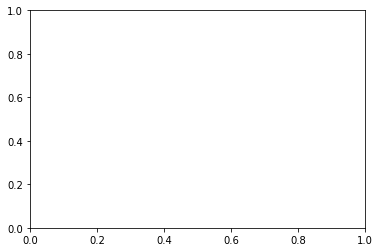

In [915]:
sns.boxplot(categorical_series)

I am again having difficulty with my now "numeric" data in getting it to visualize. 

# CSV

My next file type is this CSV concerning Chicago employee overtime and supplemental earnings. In hypothetical Chicago, using data from real world chicago, the government is wanting to determine how much overtime and supplemental income employees are earning, in order to determine what percentage of their income comes from wages paid by employers for 40 hours a week, and what percentage comes from overtime and side hustles (supplemental income).

In [829]:
import pandas as pd
import numpy as np

In [830]:
chicago_df = pd.read_csv("file:///Users/moirafacer/Desktop/employee-overtime-and-supplemental-earnings-2012.csv")


In [831]:
chicago_df.head()

,Department Name,Employee Name,Title,Jan 2012,Feb 2012,Mar 2012,Apr 2012,May 2012,Jun 2012,Jul 2012,Aug 2012,Sept 2012,Oct 2012,Nov 2012,Dec 2012,2012 Total
0,Administrative Hearings,"WOODRIDGE, RACHENETTE",ADMINISTRATIVE ASST II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,445.0,0.0,445.0
1,Animal Care and Control,"HOLLOWAY, EFREM J",ANIMAL CARE AIDE II,278.0,670.0,1040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287.0,2275.0
2,Animal Care and Control,"EDGECOMBE, CHERYL K",ANIMAL CONTROL OFFICER,404.0,0.0,771.0,0.0,147.0,637.0,1114.0,478.0,257.0,539.0,257.0,514.0,5118.0
3,Animal Care and Control,"RUGLIC, MARY S",ANIMAL CONTROL OFFICER,0.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147.0
4,Animal Care and Control,"WASHINGTON, MONTESE DAJUAN",VETERINARY ASST,575.0,780.0,1135.0,492.0,657.0,913.0,1552.0,821.0,780.0,954.0,855.0,472.0,9985.0


The data appears to have read in correctly, so we can move onto the description portion. 

In [832]:
chicago_df.describe

<bound method NDFrame.describe of                Department Name                Employee Name  \
0      Administrative Hearings        WOODRIDGE, RACHENETTE   
1      Animal Care and Control            HOLLOWAY, EFREM J   
2      Animal Care and Control          EDGECOMBE, CHERYL K   
3      Animal Care and Control               RUGLIC, MARY S   
4      Animal Care and Control   WASHINGTON, MONTESE DAJUAN   
5      Animal Care and Control              CEHAJIC, TIHANA   
6      Animal Care and Control               ZAVALA, VICTOR   
7      Animal Care and Control             HAMILTON, ARTHUR   
8      Animal Care and Control     MCDONALD, KOLLEEN DENISE   
9      Animal Care and Control     MCDONALD, KOLLEEN DENISE   
10     Animal Care and Control  NORRIS, MICHAELIA CONSTANCE   
11     Animal Care and Control          SAUNDERS, JASMINE M   
12     Animal Care and Control              DEUTSCH, DANA K   
13     Animal Care and Control            MCCALL, GOVANNI D   
14     Animal Care an

In [833]:
chicago_df['Jan 2012'].describe

<bound method NDFrame.describe of 0           0.0
1         278.0
2         404.0
3           0.0
4         575.0
5        1950.0
6           0.0
7         542.0
8           0.0
9         179.0
10        235.0
11        632.0
12          0.0
13          0.0
14          0.0
15          0.0
16          0.0
17          0.0
18          0.0
19       1182.0
20       1351.0
21        791.0
22       1694.0
23        656.0
24        183.0
25        712.0
26          0.0
27       1641.0
28       1044.0
29        679.0
          ...  
24240       0.0
24241     102.0
24242       0.0
24243       0.0
24244       0.0
24245       0.0
24246     715.0
24247       0.0
24248     155.0
24249       0.0
24250     330.0
24251       0.0
24252     381.0
24253     646.0
24254     323.0
24255     364.0
24256     381.0
24257    2004.0
24258       0.0
24259       0.0
24260       0.0
24261    1714.0
24262     812.0
24263     482.0
24264     736.0
24265       0.0
24266     296.0
24267      51.0
24268      25.0
24269 

 Since I was unable to analyze neither the total data nor a single column, I have to change the type of data to be numeric. 

Once transformed, the data can then be analyzed. 

In [834]:
chicago_df.describe()

,Jan 2012,Feb 2012,Mar 2012,Apr 2012,May 2012,Jun 2012,Jul 2012,Aug 2012,Sept 2012,Oct 2012,Nov 2012,Dec 2012,2012 Total
count,24269.000000,24264.000000,24266.000000,24247.000000,24265.000000,24266.000000,24261.000000,24242.000000,24267.000000,24265.000000,24251.000000,24265.000000,24268.000000
mean,350.614323,388.003215,344.017226,420.095888,310.766413,457.383829,397.584477,432.061505,415.146372,590.777334,500.922189,495.024562,5097.667669
std,710.526882,803.828773,733.881846,976.293421,725.134549,944.546444,829.093212,968.348960,841.778383,1061.509749,922.997795,962.850610,7287.914850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,715.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2509.000000
75%,413.000000,450.000000,373.000000,441.500000,281.000000,492.000000,410.000000,489.000000,445.000000,788.000000,609.000000,541.000000,6441.250000
max,11686.000000,23230.000000,11408.000000,15025.000000,11785.000000,13114.000000,14804.000000,62689.000000,17427.000000,14291.000000,9727.000000,11521.000000,105102.000000


Now that the data has been succesfully transformed, the function .describe has worked. This basic analysis tells us a few things, firstly, October 2012 has the highest mean, meaning that October was the month when chicago employees made the most extra cash. (you know, Halloween bonuses, a very common thing.) The month when the least supplemenatal income was made was May.  
This analysis also tells us about the wide difference in amounts of supplemental income, each month some employees made no supplemental income while others made more than 10,000. Which is due either to an obscene amount of overtime, increbily high wages, or a serious side hustle.  

In [835]:
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24270 entries, 0 to 24269
Data columns (total 16 columns):
Department Name    24270 non-null object
Employee Name      24270 non-null object
Title              24270 non-null object
Jan 2012           24269 non-null float64
Feb 2012           24264 non-null float64
Mar 2012           24266 non-null float64
Apr 2012           24247 non-null float64
May 2012           24265 non-null float64
Jun 2012           24266 non-null float64
Jul 2012           24261 non-null float64
Aug 2012           24242 non-null float64
Sept 2012          24267 non-null float64
Oct 2012           24265 non-null float64
Nov 2012           24251 non-null float64
Dec 2012           24265 non-null float64
2012 Total         24268 non-null float64
dtypes: float64(13), object(3)
memory usage: 3.0+ MB


However if I wanted to, I could take a closer look at each individual column, such as Jan 2012. 

In [836]:
chicago_df['Jan 2012'].mean()

350.614322798632

In [837]:
chicago_df['Jan 2012'].unique()

array([   0.,  278.,  404., ..., 3614., 3296., 1676.])

The next step is to visualize the data. 

In [838]:
import seaborn as sns

I attempted multiple kinds of other graphs, however I recieved an error message on all that I tried except for boxplots. So I shall be using boxplots. In order to better understand the distribution of supplemental income for employees of Chicago, I am going to create a series of boxplots. January, May, October and the whole year. 

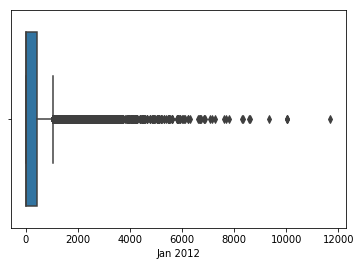

In [839]:
sns.boxplot(chicago_df['Jan 2012'])

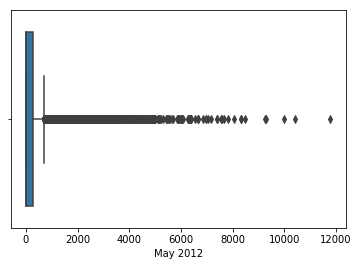

In [840]:
sns.boxplot(chicago_df['May 2012'])

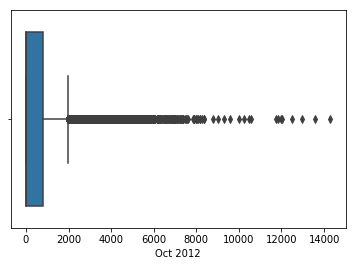

In [841]:
sns.boxplot(chicago_df['Oct 2012'])

As evident in the above and below graphs, there are a massive amount of outliers in the data. However the scale of the graph below is slightly different as it totals the yearly supplemental income for individuals, however the theme of some individuals make large amounts in overtime or supplemental income is very clear. In relation to the earlier idea of comparing which percentage of income is related to wage and which is realted to supplemental income, it could be said that some Chicago employees have low wages and are working very hard via overtime and other means to supplement their income, as evidenced by the reported high levels of overtime/supplemental income.

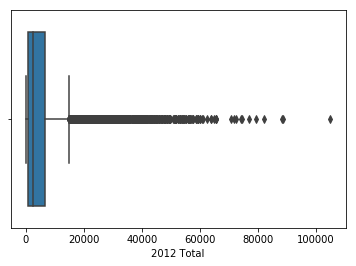

In [842]:
sns.boxplot(chicago_df['2012 Total'])

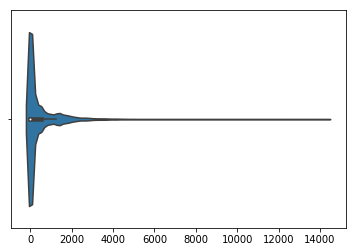

In [843]:
sns.violinplot(chicago_df[['May 2012', 'Oct 2012']])

# Excel

My final file type is an excel file concerning the fascinating subject of seabird avoidance of windturbines. It's a nailbiter. As we all known, passenger pigeons, and seabirds are our main way of carrying information from place to place, especially long distance over oceans. However a tragic epidemic is stopping our aviators from reaching their destinations and bringing their valuable information. The wind turbine. 

In [983]:
import pandas as pd 
import seaborn as sns 
import xlrd
from pandas import ExcelWriter 
from pandas import ExcelFile

In [989]:
df=pd.read_excel('Table S3.xlsx')

In [991]:
df.head()

,Species,length,wingspan,speed,Flight mode,Site,Collision Rate,N Birds Passing,Hours Survey,Birds/Hr,...,Rotor Diameter,Rotor Speed**,Pitch**,Hub Height,N Turbines,Rotor Swept Area,P(Coll) Options 1 &2,Predicted Collisions Option 1,Avoidance Rate Option 1,Non-Avoidance Rate Option 1
0,Herring Gull,0.61,1.44,12.8,flap,Boudwijnkanaal (October 2001),1.0,812.00,17.0,47.764706,...,48.0,43.0,10.0,55.0,5.0,9047.786842,0.137860,103.181218,0.990308,0.009692
1,Black-headed Gull,0.36,1.05,9.5,flap,Boudwijnkanaal (October 2005),6.0,696.00,17.0,40.941176,...,48.0,43.0,10.0,55.0,7.0,12666.901579,0.117458,144.956697,0.958608,0.041392
2,Herring/Lesser-black-backed Gull,0.61,1.44,12.8,flap,Boudwijnkanaal (October 2005),4.0,339.00,17.0,19.941176,...,48.0,43.0,10.0,55.0,7.0,12666.901579,0.137860,90.073455,0.955592,0.044408
3,All Species,0.61,1.44,12.8,flap,Boudwijnkanaal (October 2005),11.0,1035.00,17.0,60.882353,...,48.0,43.0,10.0,55.0,7.0,12666.901579,0.137860,260.336199,0.957747,0.042253
4,Black-headed Gull,0.36,1.05,9.5,flap,Bouin,28.0,5769.92,370.0,15.594378,...,80.0,18.0,10.0,60.0,8.0,40212.385966,0.106177,583.659614,0.952027,0.047973


With the development of new technology has come the wind turbine. While our renewable energy sources have grown, our messenger seabird populations have dwindled due to the fact that they tragically crash into the turbines.  Because of this, it is of the upmost importance that we are able to predict the rates at which the seabirds will crash into the wind turbines, and the rates of how many will crash into the turbines in order to prevent as many tragic deaths as possible. 

In [996]:
df.describe()

,length,wingspan,speed,Collision Rate,N Birds Passing,Hours Survey,Birds/Hr,N Days,Hours Daylight,Nocturnal Correction,...,Rotor Diameter,Rotor Speed**,Pitch**,Hub Height,N Turbines,Rotor Swept Area,P(Coll) Options 1 &2,Predicted Collisions Option 1,Avoidance Rate Option 1,Non-Avoidance Rate Option 1
count,57.000000,57.000000,57.000000,57.000000,49.000000,55.000000,55.000000,55.000000,55.000000,55.00,...,57.000000,57.000000,57.0,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,0.515789,1.301754,11.582456,2.076667,5115.467592,64.592727,25.365804,171.690909,10.620727,0.25,...,70.000000,24.684211,10.0,68.122807,8.473684,36308.323264,0.113001,180.921854,0.898886,0.101114
std,0.125995,0.197634,1.688948,6.348224,23368.809965,83.029758,71.377217,316.311314,2.140563,0.00,...,20.829238,11.572995,0.0,18.315753,6.987502,36595.612255,0.017688,488.752163,0.654735,0.654735
min,0.260000,0.775000,9.500000,0.000000,1.000000,11.700000,0.026316,31.000000,9.200000,0.25,...,30.000000,15.000000,10.0,34.000000,2.000000,3619.114737,0.065554,0.074879,-3.952360,0.000000
25%,0.360000,1.050000,9.500000,0.000000,39.000000,27.000000,1.093150,61.000000,9.300000,0.25,...,48.000000,18.000000,10.0,55.000000,4.000000,12723.450247,0.106177,2.652812,0.986083,0.000000
50%,0.590000,1.440000,12.800000,0.000000,182.000000,38.000000,5.062500,61.000000,10.000000,0.25,...,80.000000,18.000000,10.0,80.000000,4.000000,16231.823843,0.113323,31.796994,1.000000,0.000000
75%,0.610000,1.440000,12.800000,1.000000,1021.000000,57.000000,17.247222,152.000000,10.000000,0.25,...,82.000000,43.000000,10.0,80.000000,19.000000,95504.416669,0.117458,101.058006,1.000000,0.013917
max,0.710000,1.575000,13.700000,37.000000,158600.000000,370.000000,507.178082,1461.000000,16.300000,0.25,...,92.000000,43.000000,10.0,80.000000,19.000000,95504.416669,0.146262,3349.553647,1.000000,4.952360


In [994]:
df['N Birds Passing'].mean()

5115.467591836735

In [995]:
df['Collision Rate'].mean()

2.0766666666666667

In [993]:
df['speed'].mean()

11.582456140350878

In [992]:
df['Collision Rate'].mean()

2.0766666666666667

This brings us to the good news, and the bad news. The bad news, our data clearly shows that birds are definitely smacking into wind turbines. The good news, is that on average only 2% of birds passing by smack the turbines. Other bad news, the turbines spin almost twice as fast as the birds fly, so avoidance can be difficult if the birds get too close, however, the data shows on average on two percent of the birds get to close... 
It is important to understand the magnitude of this issue, and so we will visualize our data. 

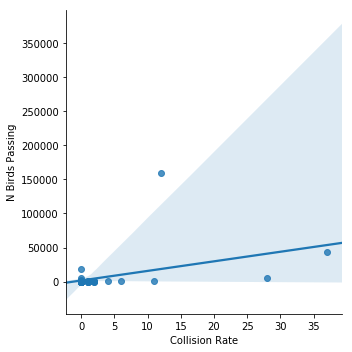

In [997]:
sns.lmplot(x="Collision Rate", y="N Birds Passing", data=df)

This graph suggest that the more birds that fly by the turbines, the more birds smack into the turbines. However, it is also necessary to determine the relationship between the percentage of bird collisions and the rate that the turbines turn. 

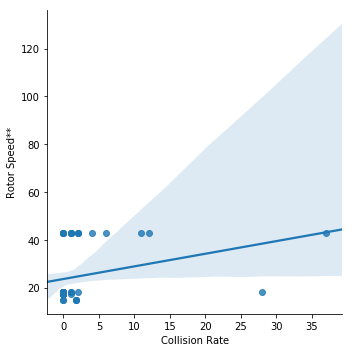

In [998]:
sns.lmplot(x="Collision Rate", y="Rotor Speed**", data=df)

This scatter plot is very unclear, however if we change the axis...

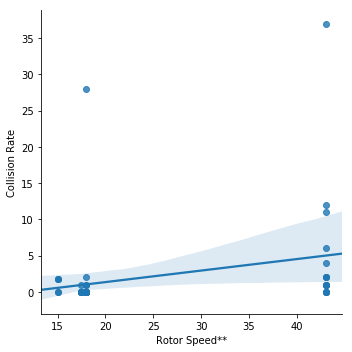

In [1000]:
sns.lmplot(x="Rotor Speed**", y="Collision Rate", data=df)

A very strange but clear relationship is shown. Collisions appear clustered at rotor speeds betwen 15-20 mph,and are essentially non existent until rotor speeds over 40 mph. This tracks with the idea that if they fly too slow they can't turn away in time, and if they fly too quickly they smack into the turbines before they can change their course. It is our recommendation that rotor speeds be changed to 30mph where essentially no bird collisions occur in order to save lives. 